In [ ]:
! pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Customer segmentation/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df.iloc[:5000]

In [ ]:
df.describe

<bound method NDFrame.describe of      InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
4995    536836     21843             RED RETROSPOT CAKE STAND         2   
4996    536836     21531         RED RETROSPOT SUGAR JAM BOWL         2   
4997    536836     21539            RED RETROSPOT BUTTER DISH         3   
4998    536836     22198                LARGE POPCORN HOLDER          2   
4999    536836     22197                 SMALL POPCORN HOLDER         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
0    2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1    2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2    2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3    2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4    2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                  ...        ...         ...             ...  
4995 2010-12-02 18:08:00      10.95     18168.0  United Kingdom  
4996 2010-12-02 18:08:00       2.55     18168.0  United Kingdom  
4997 2010-12-02 18:08:00       4.95     18168.0  United Kingdom  
4998 2010-12-02 18:08:00       1.65     18168.0  United Kingdom  
4999 2010-12-02 18:08:00       0.85     18168.0  United Kingdom  

[5000 rows x 8 columns]>

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
4995,536836,21843,RED RETROSPOT CAKE STAND,2,2010-12-02 18:08:00,10.95,18168.0,United Kingdom
4996,536836,21531,RED RETROSPOT SUGAR JAM BOWL,2,2010-12-02 18:08:00,2.55,18168.0,United Kingdom
4997,536836,21539,RED RETROSPOT BUTTER DISH,3,2010-12-02 18:08:00,4.95,18168.0,United Kingdom
4998,536836,22198,LARGE POPCORN HOLDER,2,2010-12-02 18:08:00,1.65,18168.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5000 non-null   object        
 1   StockCode    5000 non-null   object        
 2   Description  4988 non-null   object        
 3   Quantity     5000 non-null   int64         
 4   InvoiceDate  5000 non-null   datetime64[ns]
 5   UnitPrice    5000 non-null   float64       
 6   CustomerID   3795 non-null   float64       
 7   Country      5000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 312.6+ KB


In [ ]:
df.nunique()

InvoiceNo       300
StockCode      1595
Description    1591
Quantity         85
InvoiceDate     265
UnitPrice       135
CustomerID      197
Country           7
dtype: int64

In [ ]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description      12
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1205
Country           0
dtype: int64

Exploratory Data Analysis:

In [ ]:
df_agg= df.groupby("InvoiceDate").Quantity.sum()
df_agg.head()

InvoiceDate
2010-12-01 08:26:00     40
2010-12-01 08:28:00     12
2010-12-01 08:34:00     98
2010-12-01 08:35:00      3
2010-12-01 08:45:00    449
Name: Quantity, dtype: int64

In [ ]:
df_agg=pd.DataFrame(df_agg)
df_agg=df_agg.reset_index()
df_agg.head()

,InvoiceDate,Quantity
0,2010-12-01 08:26:00,40
1,2010-12-01 08:28:00,12
2,2010-12-01 08:34:00,98
3,2010-12-01 08:35:00,3
4,2010-12-01 08:45:00,449


In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib

def plot_df(df, x, y, title="", xlabel='InvoiceDate', ylabel='Quantity', dpi=10):
    plt.figure(figsize=(16, 5), dpi=dpi)  # figsize and dpi adjusted
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)  # Setting title
    plt.plot(df[x], df[y], color='tab:blue', marker='o')  # Accessing DataFrame columns
    plt.show()






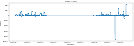

In [ ]:
plot_df(df_agg, x='InvoiceDate', y='Quantity', title='Orders in 2011')


In [ ]:
df['Revenue'] = df['Quantity']*df['UnitPrice']

<Axes: ylabel='Revenue'>

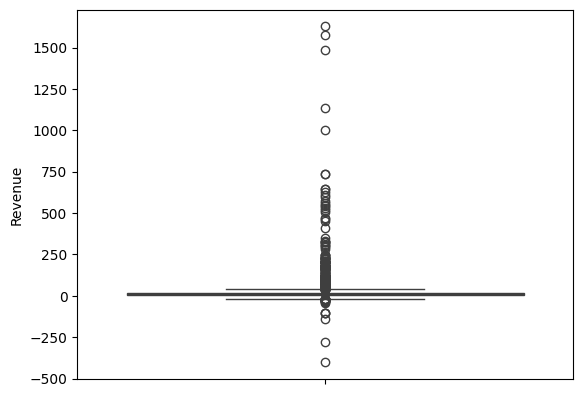

In [ ]:
sns.boxplot(y=df['Revenue'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5000 non-null   object        
 1   StockCode    5000 non-null   object        
 2   Description  4988 non-null   object        
 3   Quantity     5000 non-null   int64         
 4   InvoiceDate  5000 non-null   datetime64[ns]
 5   UnitPrice    5000 non-null   float64       
 6   CustomerID   3795 non-null   float64       
 7   Country      5000 non-null   object        
 8   Revenue      5000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 351.7+ KB


In [ ]:
df_revenue = df.groupby(['InvoiceDate'])['Revenue'].sum().reset_index()
df_revenue.head()

,InvoiceDate,Revenue
0,2010-12-01 08:26:00,139.12
1,2010-12-01 08:28:00,22.20
2,2010-12-01 08:34:00,348.78
3,2010-12-01 08:35:00,17.85
4,2010-12-01 08:45:00,855.86


In [ ]:
plot_data = [
    go.Scatter(
        x=df['InvoiceDate'],
        y=df['Revenue'],
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='day wise Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

RFM Analysis:

In [ ]:
NOW = dt.date(2010,12,2)
df['Date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [ ]:
#Recency

df_recency = df.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()


,CustomerID,Recency
0,12431.0,1
1,12433.0,1
2,12471.0,0
3,12472.0,1
4,12583.0,1


In [ ]:
#Frequency - Monetarty

FM_Table = df.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x),
                                         'Revenue'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoiceNo' :'Frequency',
                           'Revenue':'Monetary'},inplace= True)
FM_Table.head()


,Frequency,Monetary
CustomerID,,
12431.0,14,358.25
12433.0,73,1919.14
12471.0,1,-17.00
12472.0,14,-122.30
12583.0,20,855.86


In [ ]:
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()


,CustomerID,Recency,Frequency,Monetary
0,12431.0,1,14,358.25
1,12433.0,1,73,1919.14
2,12471.0,0,1,-17.00
3,12472.0,1,14,-122.30
4,12583.0,1,20,855.86


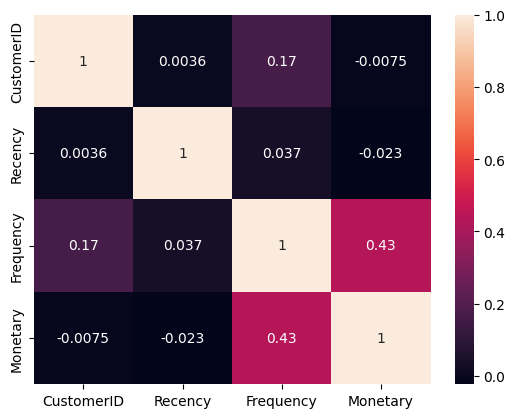

In [ ]:
#Heatmap check
sns.heatmap(RFM_Table.corr(), annot=True);

Modeling Data: RFM Quantiles

In [ ]:
pip install numpy

In [ ]:
pip install --upgrade numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.


In [ ]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [ ]:
segmented_rfm = RFM_Table.copy()

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12431.0,1,14,358.25,3,2,2
1,12433.0,1,73,1919.14,3,1,1
2,12471.0,0,1,-17.00,1,4,4
3,12472.0,1,14,-122.30,3,2,4
4,12583.0,1,20,855.86,3,2,1


Calculating the total RFM score combined.

RFM_Score = R_quartile + F_quartile + M_quartile

In [ ]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)


In [ ]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,12431.0,1,14,358.25,3,2,2,322
1,12433.0,1,73,1919.14,3,1,1,311
2,12471.0,0,1,-17.00,1,4,4,144
3,12472.0,1,14,-122.30,3,2,4,324
4,12583.0,1,20,855.86,3,2,1,321


In [ ]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [ ]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,12431.0,1,14,358.25,3,2,2,322,7
1,12433.0,1,73,1919.14,3,1,1,311,5
2,12471.0,0,1,-17.00,1,4,4,144,9
3,12472.0,1,14,-122.30,3,2,4,324,9
4,12583.0,1,20,855.86,3,2,1,321,6


In [ ]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))


Best Customers:  14
Loyal Customers:  48
Big Spenders:  49
Almost Lost:  5
Lost Customers:  8
Lost Cheap Customers:  0


In [ ]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"

    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"

    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"

    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"

    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"

    else:
        label[i] = "Others"

In [ ]:
# Adding the 'Label' column to the dataframe

segmented_rfm['Label'] = label


In [ ]:
# Count the frequency that a value occurs in a dataframe column for the labels.

segmented_rfm['Label'].value_counts()

Label
Others             113
Loyal Customers     34
Big Spenders        23
Best Customers      14
Lost Customers       8
Almost Lost          5
Name: count, dtype: int64

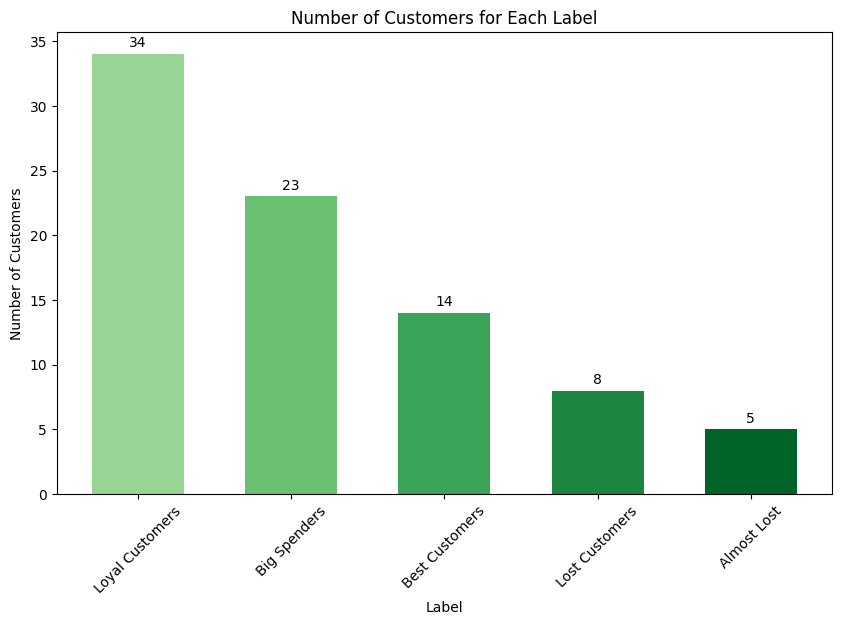

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['Loyal Customers', 'Big Spenders', 'Best Customers', 'Lost Customers', 'Almost Lost']
counts = [34, 23, 14, 8, 5]
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(labels)))
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=colors,width=0.6)
plt.title('Number of Customers for Each Label')
plt.xlabel('Label')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, count, ha='center', va='bottom')
plt.show()


Modeling Data: K-Means Clustering

In [ ]:
RFM_Table_New = RFM_Table.drop('CustomerID', axis=1)

In [ ]:
RFM_Table_New.head()

,Recency,Frequency,Monetary
0,1,14,358.25
1,1,73,1919.14
2,0,1,-17.00
3,1,14,-122.30
4,1,20,855.86


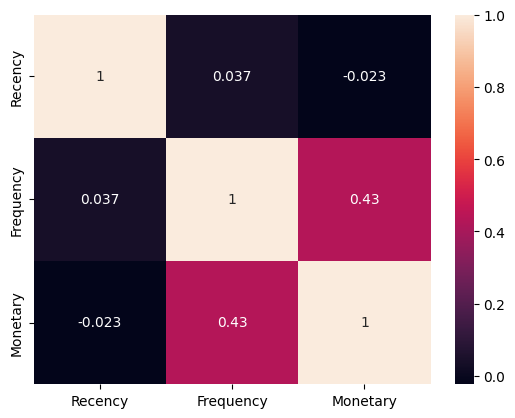

In [ ]:
#Heatmap check
sns.heatmap(RFM_Table_New.corr(), annot=True);

<Axes: xlabel='Recency', ylabel='Density'>

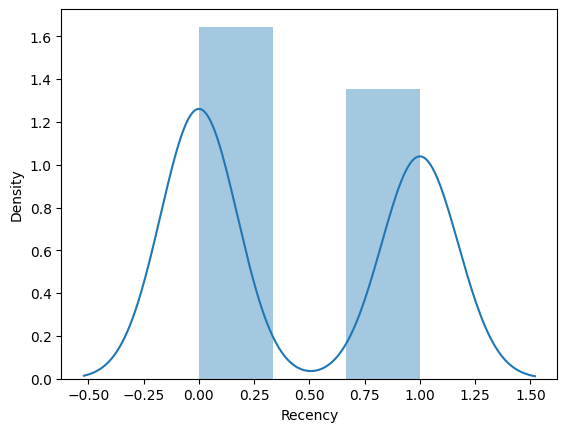

In [ ]:
#Analyze distribution

sns.distplot(RFM_Table_New['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

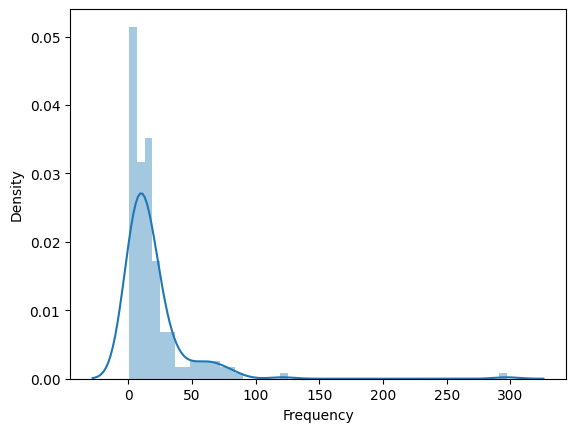

In [ ]:

sns.distplot(RFM_Table_New['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

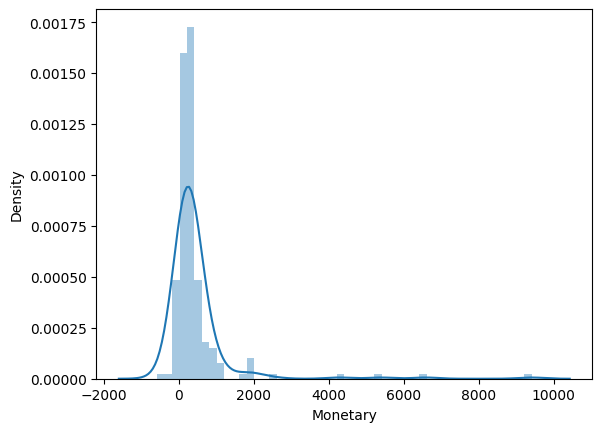

In [ ]:
sns.distplot(RFM_Table_New['Monetary'])

In [ ]:
df_rfm_log = RFM_Table_New.copy()
df_rfm_log.head()

,Recency,Frequency,Monetary
0,1,14,358.25
1,1,73,1919.14
2,0,1,-17.00
3,1,14,-122.30
4,1,20,855.86


In [ ]:
df_rfm_log = np.log(df_rfm_log+1)

In [ ]:
scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_New_scaled = scaler.transform(df_rfm_log)

In [ ]:
RFM_Table_New_scaled = pd.DataFrame(RFM_Table_New_scaled, columns=RFM_Table_New.columns)
RFM_Table_New_scaled.head()

,Recency,Frequency,Monetary
0,1.101582,0.205398,0.229903
1,1.101582,1.783806,2.026162
2,-0.907785,-1.787279,NaN
3,1.101582,0.205398,NaN
4,1.101582,0.538158,1.161457


<Axes: xlabel='Recency', ylabel='Density'>

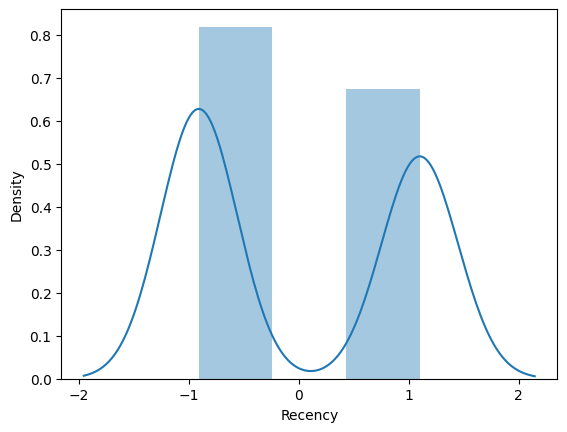

In [ ]:

#Analyze distribution

sns.distplot(RFM_Table_New_scaled['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

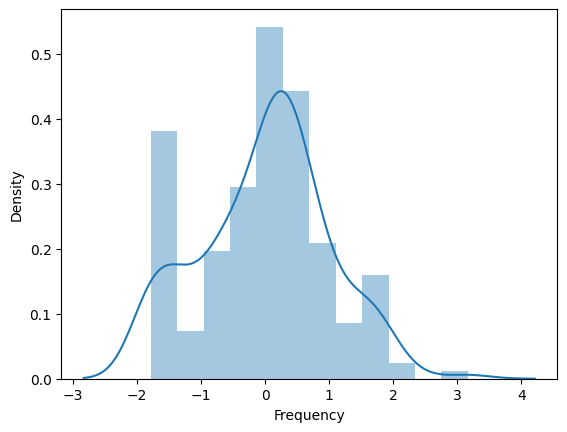

In [ ]:
sns.distplot(RFM_Table_New_scaled['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

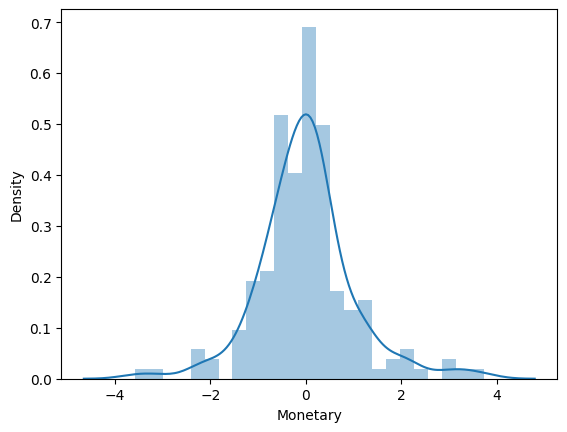

In [ ]:

sns.distplot(RFM_Table_New_scaled['Monetary'])

In [ ]:
X = np.asarray(RFM_Table_New_scaled)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f987e91d360>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so: cannot open shared object file: No such file or directory


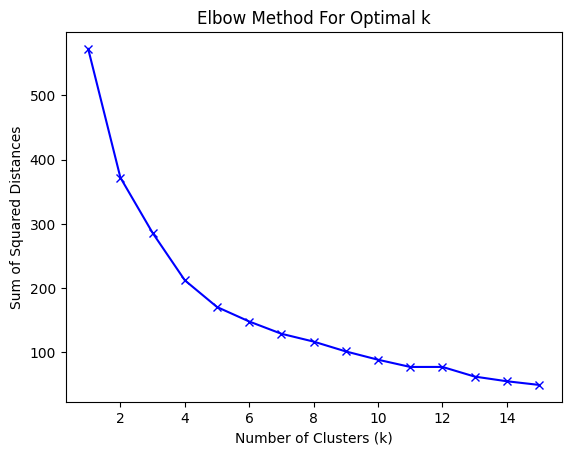

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate an imputer to fill missing values with mean, median, or any other strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to fill missing values in your data
X_imputed = imputer.fit_transform(X)

# Now, you can proceed with fitting the KMeans algorithm
Sum_of_squared_distances = []
K = range(1, 16)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_imputed)
    Sum_of_squared_distances.append(km.inertia_)

# Plot the elbow method
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)

    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new

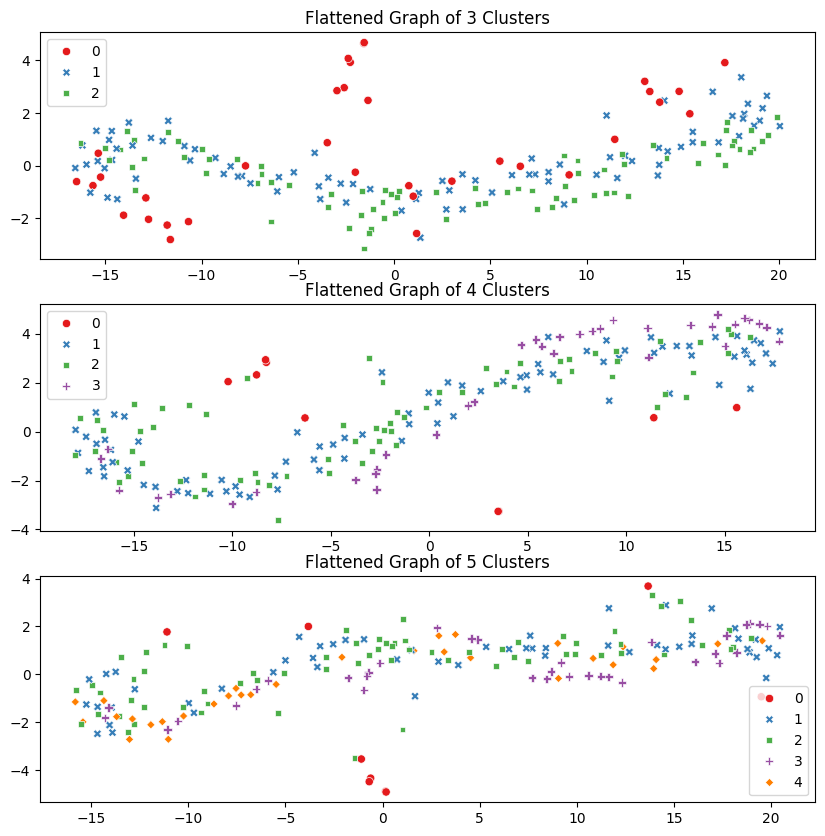

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate an imputer to fill missing values with mean, median, or any other strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to fill missing values in your data
RFM_Table_New_scaled_imputed = imputer.fit_transform(RFM_Table_New_scaled)

# Now, you can proceed with fitting the KMeans algorithm
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled_imputed, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 =  kmeans(RFM_Table_New_scaled_imputed,4,RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 =  kmeans(RFM_Table_New_scaled_imputed,5,RFM_Table)


# Evaluating Model: K-Means Clustering

Davies Bouldin Score is a metric for evaluating clustering algorithms.
The smaller Davies Bouldin Score is The more optimal the cluster.


K-Means = 3

In [ ]:
from sklearn.metrics import davies_bouldin_score


In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import davies_bouldin_score

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_imputed)

# Calculate Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X_imputed, kmeans.labels_)
print("Davies-Bouldin score:", davies_bouldin)


Davies-Bouldin score: 1.0202419770531979


In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import davies_bouldin_score

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_imputed)

# Calculate Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X_imputed, kmeans.labels_)
print("Davies-Bouldin score:", davies_bouldin)


Davies-Bouldin score: 0.9673363782341449


In [ ]:

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_imputed)

# Calculate Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X_imputed, kmeans.labels_)
print("Davies-Bouldin score:", davies_bouldin)


Davies-Bouldin score: 0.8916442421818868


K-Means 4 clusters has lowest davies bouldin score than other cluster. Therefore the optimum cluster is 4.

In [ ]:
df_rfm_k4.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12431.0,1,14,358.25,1
1,12433.0,1,73,1919.14,0
2,12471.0,0,1,-17.00,3
3,12472.0,1,14,-122.30,1
4,12583.0,1,20,855.86,1


In [ ]:
df_rfm_k4.Cluster.value_counts()

Cluster
1    83
2    69
3    36
0     9
Name: count, dtype: int64

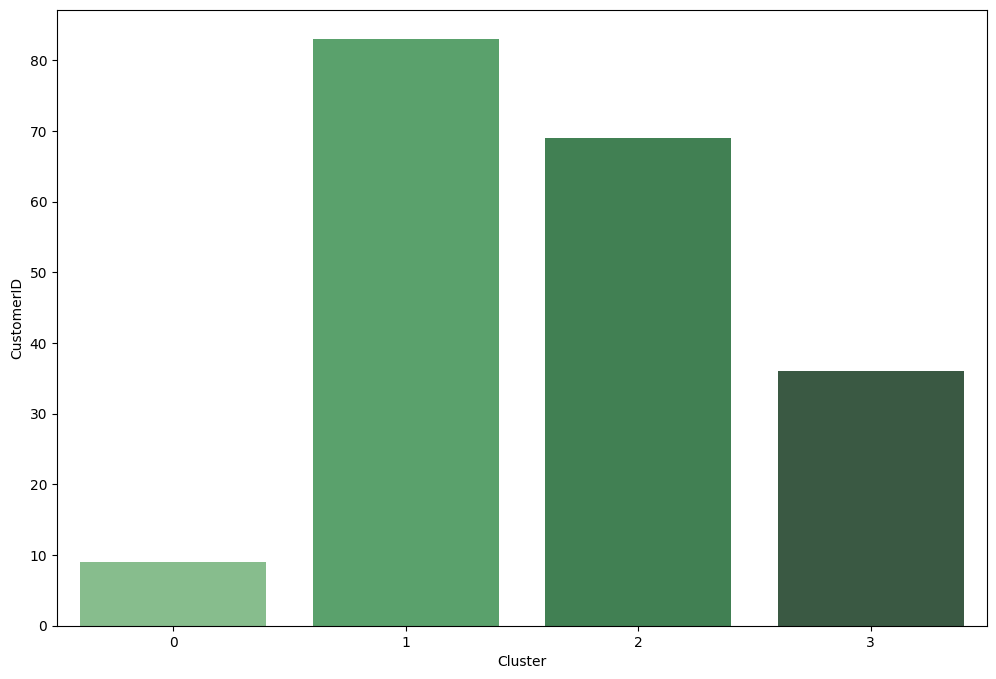

In [ ]:
import seaborn as sns
sq1=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Greens_d");

Interpretation of the clusters formed using k-means.

In [ ]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)

    return df_new

In [ ]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           0.0      68.0   3850.0     9
1           1.0      20.0    303.0    83
2           0.0      21.0    396.0    69
3           0.0       3.0     56.0    36